<a href="https://colab.research.google.com/github/luismlopes/Complete-Python-3-Bootcamp/blob/master/Reference_Notebook_Facial_Emotion_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [3]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [4]:

import numpy as np
import pandas as pd

# A library for data visualization
import matplotlib.pyplot as plt


# An advanced library for data visualization
import seaborn as sns


import zipfile
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [5]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/MIT-AI course/capstone project/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
picture_size = 48
folder_path = "Facial_emotion_images/"
#folder_path = "/content/drive/MyDrive/MIT-AI course/capstone project/Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

All faces are smiling, most of them with the mouth open showing their teeth; the eyes are also open


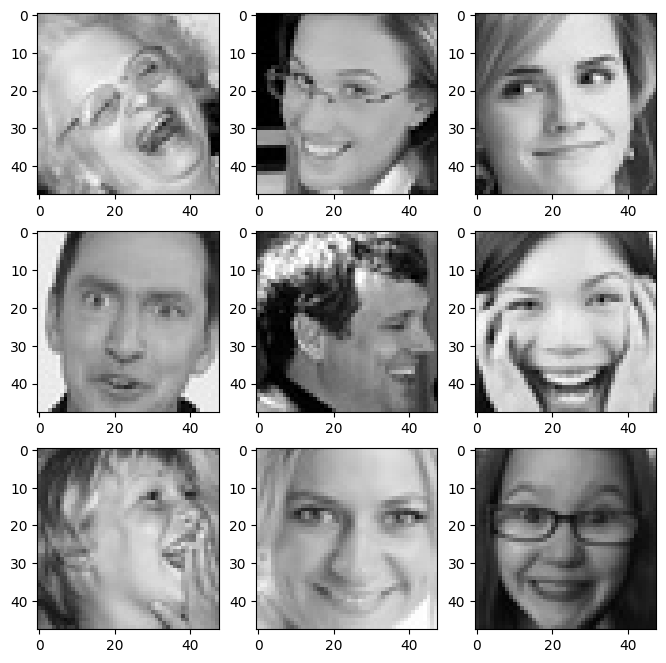

In [76]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

### **Sad**

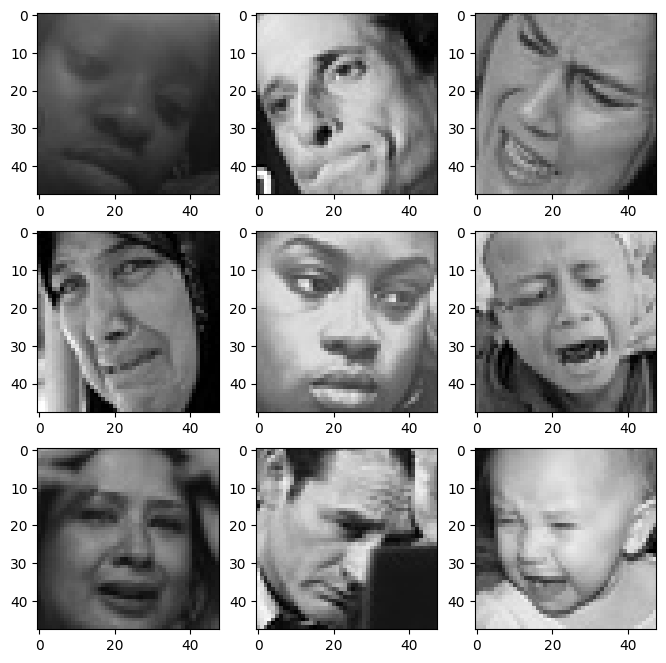

In [77]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

Some faces cry with their mouths open; the eyes seems to look to nowhere; some of the faces look down

### **Neutral**

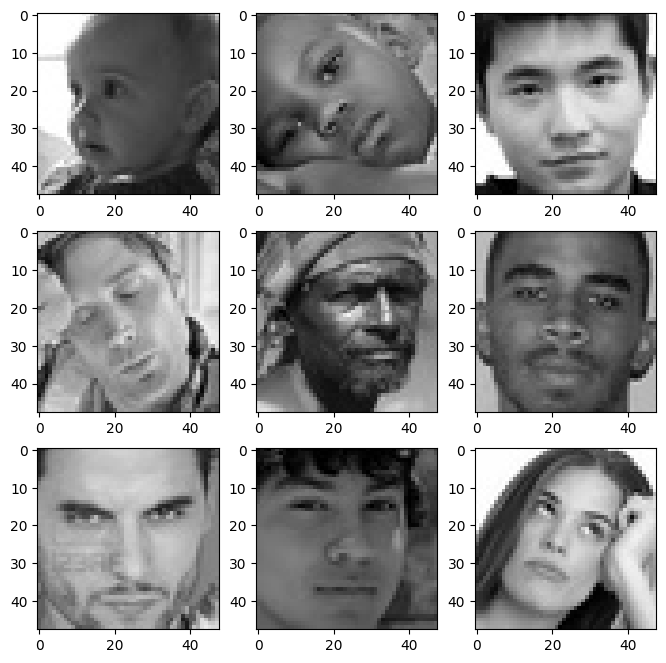

In [37]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)


In this set of images, all the faces appear with theirs mouths close, without conveying any particular emotion. Some seem relaxed, others thoughful, others sleepy.


### **Surprised**

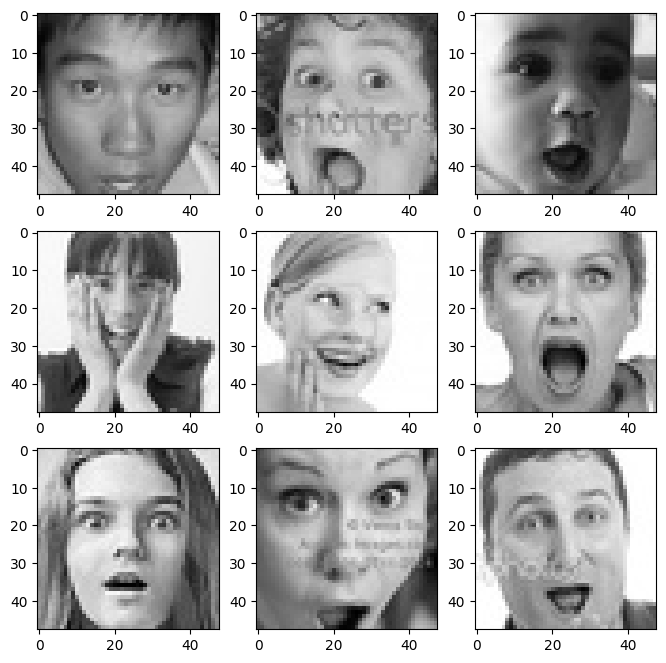

In [38]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)


Most images appear with the mouth and eyes fully open, ususally smiling

## **Checking Distribution of Classes**

In [7]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


In [24]:
(3976-3173)/3976


0.20196177062374246

The train set is well balanced for the four classes, except for the surprise class which is smaller than the other three (less 20% of the images of the other classes). The imbalance seems to be not too high and probably not a problem.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [8]:
# Data Loaders using 'grayscale' color_mode

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)



datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)



Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, ReLU


# Initializing a Sequential Model
model1 = Sequential()

# FIRST CONVOLUTIONAL BLOCK
model1.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", input_shape=(48, 48, 1)))
model1.add(ReLU())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# SECOND CONVOLUTIONAL BLOCK
model1.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same"))
model1.add(ReLU())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# THIRD CONVOLUTIONAL BLOCK
model1.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same"))
model1.add(ReLU())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# CREATING HIDDEN LAYERS
model1.add(Flatten())
model1.add(Dense(512))
model1.add(ReLU())

# CREATING OUTPUT/FINAL LAYER
model1.add(Dense(4, activation='softmax'))

# Display the model's architecture
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 re_lu (ReLU)                (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        16448     
                                                                 
 re_lu_1 (ReLU)              (None, 24, 24, 64)        0         
                                                      

### **Compiling and Training the Model**

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [14]:
from keras.optimizers import Adam

# Compile model1
model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [15]:
# Fit the model
history = model1.fit(
    train_set,
    validation_data=validation_set,
    epochs=20
)


Epoch 1/20
473/473 [==============================] - 95s 199ms/step - loss: 1.3040 - accuracy: 0.3692 - val_loss: 1.1767 - val_accuracy: 0.4756
Epoch 2/20
473/473 [==============================] - 91s 192ms/step - loss: 1.1421 - accuracy: 0.4995 - val_loss: 1.0960 - val_accuracy: 0.5200
Epoch 3/20
473/473 [==============================] - 90s 189ms/step - loss: 1.0554 - accuracy: 0.5421 - val_loss: 0.9948 - val_accuracy: 0.5879
Epoch 4/20
473/473 [==============================] - 89s 188ms/step - loss: 1.0093 - accuracy: 0.5642 - val_loss: 0.9815 - val_accuracy: 0.5915
Epoch 5/20
473/473 [==============================] - 87s 184ms/step - loss: 0.9703 - accuracy: 0.5802 - val_loss: 0.9040 - val_accuracy: 0.6237
Epoch 6/20
473/473 [==============================] - 87s 184ms/step - loss: 0.9447 - accuracy: 0.5941 - val_loss: 0.8958 - val_accuracy: 0.6261
Epoch 7/20
473/473 [==============================] - 85s 179ms/step - loss: 0.9216 - accuracy: 0.6056 - val_loss: 0.8671 - val_ac

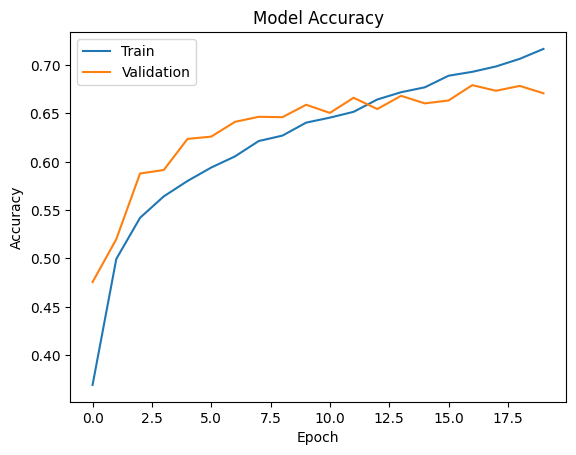

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on the Test Set**

In [17]:
test_loss, test_accuracy = model1.evaluate(test_set)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 0s 45ms/step - loss: 0.7836 - accuracy: 0.6875
Test Loss: 0.7835605144500732
Test Accuracy: 0.6875


**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [18]:
# Initializing a Sequential Model
model2 = Sequential()

# FIRST CONVOLUTIONAL BLOCK
model2.add(Conv2D(filters=256, kernel_size=(2, 2), padding="same", input_shape=(48, 48, 1)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))


# SECOND CONVOLUTIONAL BLOCK
model2.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# THIRD CONVOLUTIONAL BLOCK
model2.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))


# FOURTH CONVOLUTIONAL BLOCK
model2.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))


# CREATING HIDDEN LAYERS
model2.add(Flatten())

model2.add(Dense(512))
model2.add(ReLU())
model2.add(Dense(128))
model2.add(ReLU())


# CREATING OUTPUT/FINAL LAYER
model2.add(Dense(4, activation='softmax'))

# Display the model's architecture
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [20]:
from keras.optimizers import Adam

# Compile model2
model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [ ]:
# Fit the model
history = model2.fit(
    train_set,
    validation_data=validation_set,
    epochs=20
)


Epoch 1/20
473/473 [==============================] - 550s 1s/step - loss: 1.2614 - accuracy: 0.3928 - val_loss: 1.2868 - val_accuracy: 0.3605
Epoch 2/20
473/473 [==============================] - 554s 1s/step - loss: 1.0595 - accuracy: 0.5295 - val_loss: 0.9658 - val_accuracy: 0.5760
Epoch 3/20
473/473 [==============================] - 502s 1s/step - loss: 0.9568 - accuracy: 0.5802 - val_loss: 0.9640 - val_accuracy: 0.5769
Epoch 4/20
473/473 [==============================] - 485s 1s/step - loss: 0.8895 - accuracy: 0.6174 - val_loss: 0.9609 - val_accuracy: 0.5789
Epoch 5/20
473/473 [==============================] - 482s 1s/step - loss: 0.8448 - accuracy: 0.6416 - val_loss: 0.8333 - val_accuracy: 0.6633
Epoch 6/20
473/473 [==============================] - 474s 1s/step - loss: 0.8167 - accuracy: 0.6548 - val_loss: 0.8045 - val_accuracy: 0.6626
Epoch 7/20
415/473 [=========================>....] - ETA: 52s - loss: 0.7846 - accuracy: 0.6663

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_set)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
 Data Loaders using 'rgb' color_mode

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)



datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb' ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)



## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False


# Add classification layers on top of it
____________

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
model2.add(Dense(256))


# Add a Dense Layer with 128 neurons
model2.add(Dense(128))

# Add a DropOut layer with Drop out ratio of 0.3
model1.add(Dropout(0.3))


# Add a Dense Layer with 64 neurons
model2.add(Dense(64))

# Add a Batch Normalization layer
model2.add(BatchNormalization())
____________

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model



# FOURTH CONVOLUTIONAL BLOCK
model2.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))


# CREATING HIDDEN LAYERS
model2.add(Flatten())

model2.add(Dense(512))
model2.add(ReLU())
model2.add(Dense(128))
model2.add(ReLU())

### **Compiling and Training the VGG16 Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

### **Evaluating the VGG16 model**

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the ResNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

### **Compiling and Training the Model**

### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?